# 📊 Análise de Dados: Desempenho no ENEM 2021 (Bahia)

Este projeto realiza uma análise exploratória dos dados do **Exame Nacional do Ensino Médio (ENEM)** referentes ao ano de 2021, com foco específico no estado da **Bahia**. O objetivo é identificar padrões de desempenho e desigualdades educacionais através da análise de variáveis socioeconômicas e tipos de escola.

---

## 🎯 Objetivos do Projeto
* **Comparação de Desempenho:** Analisar a diferença de média e mediana entre alunos de escolas públicas e privadas.
* **Perfil do Candidato:** Explorar a distribuição por sexo e o volume de participantes por categoria de instituição.
* **Visualização de Dados:** Gerar gráficos que facilitem a compreensão da realidade educacional no estado.

## 🛠️ Tecnologias Utilizadas
O projeto foi desenvolvido em **Python**, utilizando as seguintes bibliotecas principais:

1.  **Pandas:** Manipulação e filtragem dos dados do ENEM.
2.  **NumPy:** Cálculos estatísticos (médias e medianas).
3.  **Matplotlib:** Criação de visualizações gráficas e histogramas.

---

# 🔍 Objetivos da Análise

Nesta etapa, buscaremos extrair insights dos dados para responder às seguintes perguntas de pesquisa:

### 🏫 Instituições e Desempenho
* **Distribuição por Escola:** Qual o número total de alunos provenientes de **escolas públicas** vs. **escolas privadas**?
* **Análise de Notas:** Qual a **média** e a **mediana** das notas entre alunos de colégios privados comparadas às dos colégios públicos?
* **Identificação de Perfil:** Qual o volume de participantes que não declararam o tipo de escola?

### 👥 Perfil Social e Presença
* **Equilíbrio de Gênero:** Qual a proporção entre participantes do sexo **Masculino (M)** e **Feminino (F)**? Quem é a maioria?
* **Engajamento:** Qual foi a **taxa de abstenção** (faltas) geral no exame?

---

### 📊 Planejamento de Visualizações
Para facilitar a leitura dos dados, geraremos os seguintes gráficos:

1.  **Tipo de Escola:** Gráfico de barras comparando "Não respondeu", "Escola Pública" e "Escola Privada".
2.  **Proporção de Gênero:**
    * Exibição numérica direta.
    * **Gráfico de Pizza:** Uma visão clássica (amada por uns, odiada por outros! 🍕) para mostrar a distribuição entre participantes masculinos e femininos.
3.  **Painel Geral:** Exibição gráfica das respostas estatísticas calculadas.

---

In [3]:
# Instale essas dependencias para o projeto funcionar : )
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

In [4]:
# Importando as bibliotecas instaladas anteriormente.
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [5]:
# Ler os dados.
df = pd.read_csv('dados_enem_2021_BA.csv')


In [38]:
# Número de alunos de colégio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.mean()

np.float64(487.37504991538157)

In [11]:
# Número de alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.mean()

np.float64(579.8338996340826)

In [39]:
# Calculando a média e a mediana entre alunos de colégio privado
df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])

/tmp/ipython-input-2242953305.py:2: FutureWarning: The provided callable <function mean at 0x7c3c7c3b1da0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])
/tmp/ipython-input-2242953305.py:2: FutureWarning: The provided callable <function median at 0x7c3c79601e40> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.query('TP_ESCOLA == 3').NU_NOTA_MT.agg([np.mean, np.median])


,NU_NOTA_MT
mean,579.8339
median,581.6000


In [13]:
# Calculando a média e a mediana entre alunos de colégio público
df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])

/tmp/ipython-input-77371870.py:2: FutureWarning: The provided callable <function mean at 0x7c3c7c3b1da0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])
/tmp/ipython-input-77371870.py:2: FutureWarning: The provided callable <function median at 0x7c3c79601e40> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.query('TP_ESCOLA == 2').NU_NOTA_MT.agg([np.mean, np.median])


,NU_NOTA_MT
mean,487.37505
median,468.90000


In [16]:
# Porcentagem entre alunos do sexo M e F
print(df['TP_SEXO'].value_counts(normalize=True) * 100)

TP_SEXO
F    64.613402
M    35.386598
Name: proportion, dtype: float64


In [37]:
# Calcular a taxa de abstenção geral
total_participantes = len(df)
total_ausentes = df['AUSENTE_TOTAL'].sum()
taxa_abstencao_geral = (total_ausentes / total_participantes) * 100

print(f"Taxa de Abstenção Geral: {taxa_abstencao_geral:.2f}%")

Taxa de Abstenção Geral: 30.35%


(array([0, 1, 2]),
 [Text(0, 0, 'Não Respondeu'),
  Text(1, 0, 'Escola Pública'),
  Text(2, 0, 'Escola Privada')])

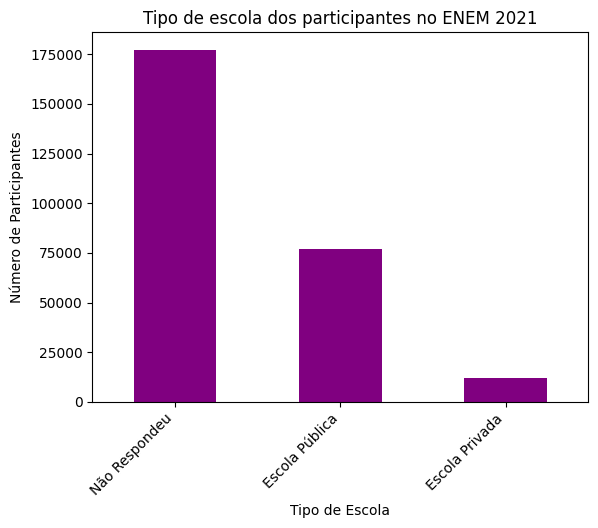

In [23]:
# Visualização gráfica (obrigado Matplotlib!)
school_type_map = {1: 'Não Respondeu', 2: 'Escola Pública', 3: 'Escola Privada'}
df['TP_ESCOLA_DESCRICAO'] = df['TP_ESCOLA'].map(school_type_map)
df['TP_ESCOLA_DESCRICAO'].value_counts().plot(kind = 'bar', color='purple')
plt.title('Tipo de escola dos participantes no ENEM 2021')
plt.xlabel('Tipo de Escola')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=45, ha='right')

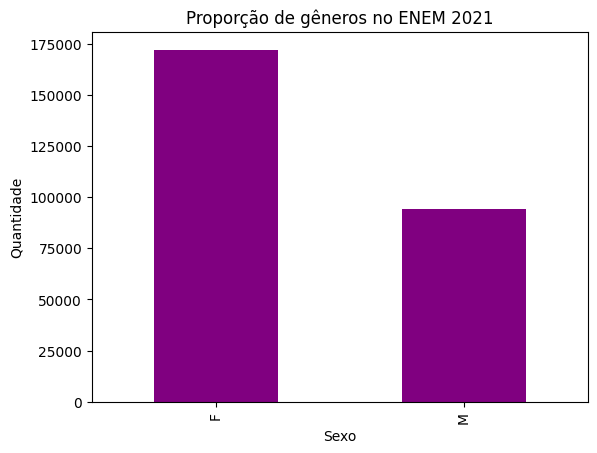

In [22]:
# Gráfico de barras
df.TP_SEXO.value_counts().plot(kind = 'bar', color = 'purple')
# título
plt.title('Proporção de gêneros no ENEM 2021')
# label do eixo x
plt.xlabel('Sexo')
# label do eixo y
plt.ylabel('Quantidade')

plt.show()
#plt.xlabel('Sexo');plt.ylabel('Quantidade');plt.show()

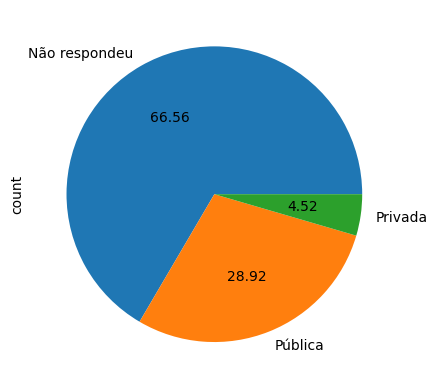

In [27]:
# Versão gráfico de pizza, amado e odiado.
 (
    df.TP_ESCOLA.map({1:'Não respondeu', 2:'Pública', 3:'Privada'})
    .value_counts()
    .plot(kind = 'pie',
          legend = False,
          autopct = '%.2f'
         )
);